In [1]:
import os
%pwd

'd:\\ML-Projects\\03-Air-Quality-Index-Predictor\\research'

In [2]:
os.chdir("../")
%pwd

'd:\\ML-Projects\\03-Air-Quality-Index-Predictor'

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Import Libraries</p>

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("darkgrid") 


<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Reading and Understanding the Dataset</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.1. Import Dataset</p>

In [5]:
df = pd.read_csv("artifacts/data_ingestion/air_pollutant_data.csv")
df.head()

,id,city,date,pm2_5,pm10,o3,no2,so2,co
0,0,Ahmedabad,01-01-2021,143.591,165.297,54.916,34.932,37.484,1414.092
1,1,Ahmedabad,02-01-2021,143.229,165.222,54.392,34.961,37.303,1427.204
2,2,Ahmedabad,03-01-2021,144.486,166.816,53.800,35.367,37.860,1448.395
3,3,Ahmedabad,04-01-2021,144.004,166.409,53.201,35.544,38.279,1459.212
4,4,Ahmedabad,05-01-2021,139.472,161.875,52.996,35.215,37.816,1444.993


<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.2. Discover Data</p>

In [6]:
# View dimensions of dataset   
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows,'\nColumns:', col)

Dimensions of dataset: (12060, 9)
Rows: 12060 
Columns: 9


In [7]:
# Check of missing values
df.isna().sum()

id       0
city     0
date     0
pm2_5    0
pm10     0
o3       0
no2      0
so2      0
co       0
dtype: int64

In [8]:
# Number of uniqe elements in each columns
unique = df.nunique()
unique.to_frame().T

,id,city,date,pm2_5,pm10,o3,no2,so2,co
0,12060,10,1206,11626,11736,11265,10789,11004,11926


In [9]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12060 entries, 0 to 12059
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12060 non-null  int64  
 1   city    12060 non-null  object 
 2   date    12060 non-null  object 
 3   pm2_5   12060 non-null  float64
 4   pm10    12060 non-null  float64
 5   o3      12060 non-null  float64
 6   no2     12060 non-null  float64
 7   so2     12060 non-null  float64
 8   co      12060 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 848.1+ KB


**The date column is an object so we have to convert it into date format**

In [10]:
# Check Statistics of Data
df.describe()

,id,pm2_5,pm10,o3,no2,so2,co
count,12060.000000,12060.000000,12060.000000,12060.000000,12060.000000,12060.000000,12060.000000
mean,6029.500000,100.091101,126.753194,53.987205,32.626765,35.375115,1240.838605
std,3481.566458,107.880135,127.002088,26.391044,21.850276,26.241574,1095.211112
min,0.000000,1.899000,2.614000,-73.847000,2.367000,2.065000,208.614000
25%,3014.750000,30.831500,42.856500,34.350750,16.737000,13.244750,542.291750
50%,6029.500000,64.469000,89.456500,53.665000,26.572500,27.593500,852.287000
75%,9044.250000,119.349750,150.518000,73.132000,40.342500,55.558000,1451.376500
max,12059.000000,734.026000,841.154000,166.735000,174.526000,181.943000,7574.902000


<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Data Preprocessing</p>

## 1. Date Column

In [11]:
df['date'].sample(20) 

10573    15-08-2023
8352     28-02-2024
2776     12-01-2022
9584     26-03-2024
3807     15-07-2021
2384     03-05-2024
1242     07-02-2021
9266     03-05-2023
7447     07-08-2021
7624     06-02-2022
1372     21-06-2021
9838     16-07-2021
10842    19-05-2024
10841    18-05-2024
4648     02-12-2023
11937    25-01-2024
2761     27-12-2021
2118     02-08-2023
5505     06-12-2022
2583     26-06-2021
Name: date, dtype: object

<div style="background-color: black; padding:20px; font-size:20px; color: white">
It seems so that the date is arranged in day-month-year format

In [12]:
df['date'] = pd.to_datetime(df['date'],format = "%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12060 entries, 0 to 12059
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      12060 non-null  int64         
 1   city    12060 non-null  object        
 2   date    12060 non-null  datetime64[ns]
 3   pm2_5   12060 non-null  float64       
 4   pm10    12060 non-null  float64       
 5   o3      12060 non-null  float64       
 6   no2     12060 non-null  float64       
 7   so2     12060 non-null  float64       
 8   co      12060 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 848.1+ KB


In [13]:
df['date'].sort_values(ascending = False)

12059   2024-05-30
9647    2024-05-30
6029    2024-05-30
3617    2024-05-30
7235    2024-05-30
           ...    
4824    2021-01-01
3618    2021-01-01
2412    2021-01-01
1206    2021-01-01
6030    2021-01-01
Name: date, Length: 12060, dtype: datetime64[ns]

## 3. City column

In [14]:
print("Total number of cities are ",df['city'].nunique() )
df['city'].value_counts()

Total number of cities are  10


city
Ahmedabad    1206
Bangalore    1206
Chennai      1206
Delhi        1206
Hyderabad    1206
Jaipur       1206
Kolkata      1206
Mumbai       1206
Pune         1206
Surat        1206
Name: count, dtype: int64

## 4. O3 Column


In [29]:
df[df['o3']<0]

In [30]:
df['o3'] = df['o3'].apply(lambda x: 0 if x < 0 else x)

Index([  881,   882,   883,   884,   885,   886,   887,   888,   889,   890,
       ...
       11751, 11752, 11753, 11754, 11755, 11756, 11757, 11758, 11759, 11760],
      dtype='int64', length=142)

## 5. Fixing names

In [15]:
df.columns

Index(['id', 'city', 'date', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [16]:
df.rename(columns = {'co':'CO','no2':'NO2','o3':'O3','pm10':'PM10','pm2_5':'PM2.5','so2':'SO2'}, inplace = True) 
df.columns

Index(['id', 'city', 'date', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')

## 6. Calculating AQI

<div style="background-color: black; padding:20px; font-size:20px; color: white">
Now we have some proper values of the major contributer of the air pollution <p>
We will we consider the columns CO , NO2, O3, PM10, PM2.5 ,SO2<p>
We will we now finding the AQI acording to the standard formula


In [17]:
new_df = df.copy()

In [18]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0


## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

### CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

new_df["PM2.5_SubIndex"] = new_df["PM2.5"].apply(lambda x: get_PM25_subindex(x))

new_df["PM10_SubIndex"] = new_df["PM10"].apply(lambda x: get_PM10_subindex(x))

new_df["O3_SubIndex"] = new_df["O3"].apply(lambda x: get_O3_subindex(x))

new_df["CO_SubIndex"] = new_df["CO"].apply(lambda x: get_CO_subindex(x))

new_df["NOx_SubIndex"] = new_df["NO2"].apply(lambda x: get_NOx_subindex(x))

new_df["SO2_SubIndex"] = new_df["SO2"].apply(lambda x: get_SO2_subindex(x))


In [19]:
new_df.head()

,id,city,date,PM2.5,PM10,O3,NO2,SO2,CO,PM2.5_SubIndex,PM10_SubIndex,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex
0,0,Ahmedabad,2021-01-01,143.591,165.297,54.916,34.932,37.484,1414.092,318.146923,143.531333,54.916,8518.188235,43.66500,46.85500
1,1,Ahmedabad,2021-01-02,143.229,165.222,54.392,34.961,37.303,1427.204,317.868462,143.481333,54.392,8595.317647,43.70125,46.62875
2,2,Ahmedabad,2021-01-03,144.486,166.816,53.800,35.367,37.860,1448.395,318.835385,144.544000,53.800,8719.970588,44.20875,47.32500
3,3,Ahmedabad,2021-01-04,144.004,166.409,53.201,35.544,38.279,1459.212,318.464615,144.272667,53.201,8783.600000,44.43000,47.84875
4,4,Ahmedabad,2021-01-05,139.472,161.875,52.996,35.215,37.816,1444.993,314.978462,141.250000,52.996,8699.958824,44.01875,47.27000


<div style="background-color: black; padding:20px; font-size:20px; color: white">
For the new columns we replaced null values with zero

In [20]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

# We are adding a Checks column which will tell us how many pollutants we have condidered 
# for the calculation of the AQI in case if some are null
new_df["Checks"] = (new_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (new_df["PM10_SubIndex"] > 0).astype(int) + \
                (new_df["SO2_SubIndex"] > 0).astype(int) + \
                (new_df["NOx_SubIndex"] > 0).astype(int) + \
                (new_df["CO_SubIndex"] > 0).astype(int) + \
                (new_df["O3_SubIndex"] > 0).astype(int)

# The Aqi value is going to the value of the highest air pollutant
new_df["AQI_calculated"] = round(new_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                  "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
new_df.loc[new_df["PM2.5_SubIndex"] + new_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
new_df.loc[new_df.Checks < 3, "AQI_calculated"] = np.NaN

new_df["AQI_bucket_calculated"] = new_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
new_df[~new_df.AQI_calculated.isna()].head(13)


,id,city,date,PM2.5,PM10,O3,NO2,SO2,CO,PM2.5_SubIndex,PM10_SubIndex,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,0,Ahmedabad,2021-01-01,143.591,165.297,54.916,34.932,37.484,1414.092,318.146923,143.531333,54.916,8518.188235,43.66500,46.85500,6,8518.0,Severe
1,1,Ahmedabad,2021-01-02,143.229,165.222,54.392,34.961,37.303,1427.204,317.868462,143.481333,54.392,8595.317647,43.70125,46.62875,6,8595.0,Severe
2,2,Ahmedabad,2021-01-03,144.486,166.816,53.800,35.367,37.860,1448.395,318.835385,144.544000,53.800,8719.970588,44.20875,47.32500,6,8720.0,Severe
3,3,Ahmedabad,2021-01-04,144.004,166.409,53.201,35.544,38.279,1459.212,318.464615,144.272667,53.201,8783.600000,44.43000,47.84875,6,8784.0,Severe
4,4,Ahmedabad,2021-01-05,139.472,161.875,52.996,35.215,37.816,1444.993,314.978462,141.250000,52.996,8699.958824,44.01875,47.27000,6,8700.0,Severe
5,5,Ahmedabad,2021-01-06,138.035,160.666,52.023,35.471,38.147,1457.115,313.873077,140.444000,52.023,8771.264706,44.33875,47.68375,6,8771.0,Severe
6,6,Ahmedabad,2021-01-07,137.113,159.796,52.150,35.063,37.934,1443.516,313.163846,139.864000,52.150,8691.270588,43.82875,47.41750,6,8691.0,Severe
7,7,Ahmedabad,2021-01-08,139.550,162.636,52.345,35.235,38.389,1457.608,315.038462,141.757333,52.345,8774.164706,44.04375,47.98625,6,8774.0,Severe
8,8,Ahmedabad,2021-01-09,141.492,165.106,52.459,35.321,38.490,1477.533,316.532308,143.404000,52.459,8891.370588,44.15125,48.11250,6,8891.0,Severe
9,9,Ahmedabad,2021-01-10,143.150,167.380,52.706,35.587,38.961,1495.681,317.807692,144.920000,52.706,8998.123529,44.48375,48.70125,6,8998.0,Severe


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">5. Exploratory Data Analysis (EDA)</p>

## 5.1 Visualizing the missing values

In [21]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(new_df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 5.2 Visualizing the pollutants

In [22]:
new_df['Particulate_Matter'] = new_df['PM2.5'] + new_df['PM10']
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3']

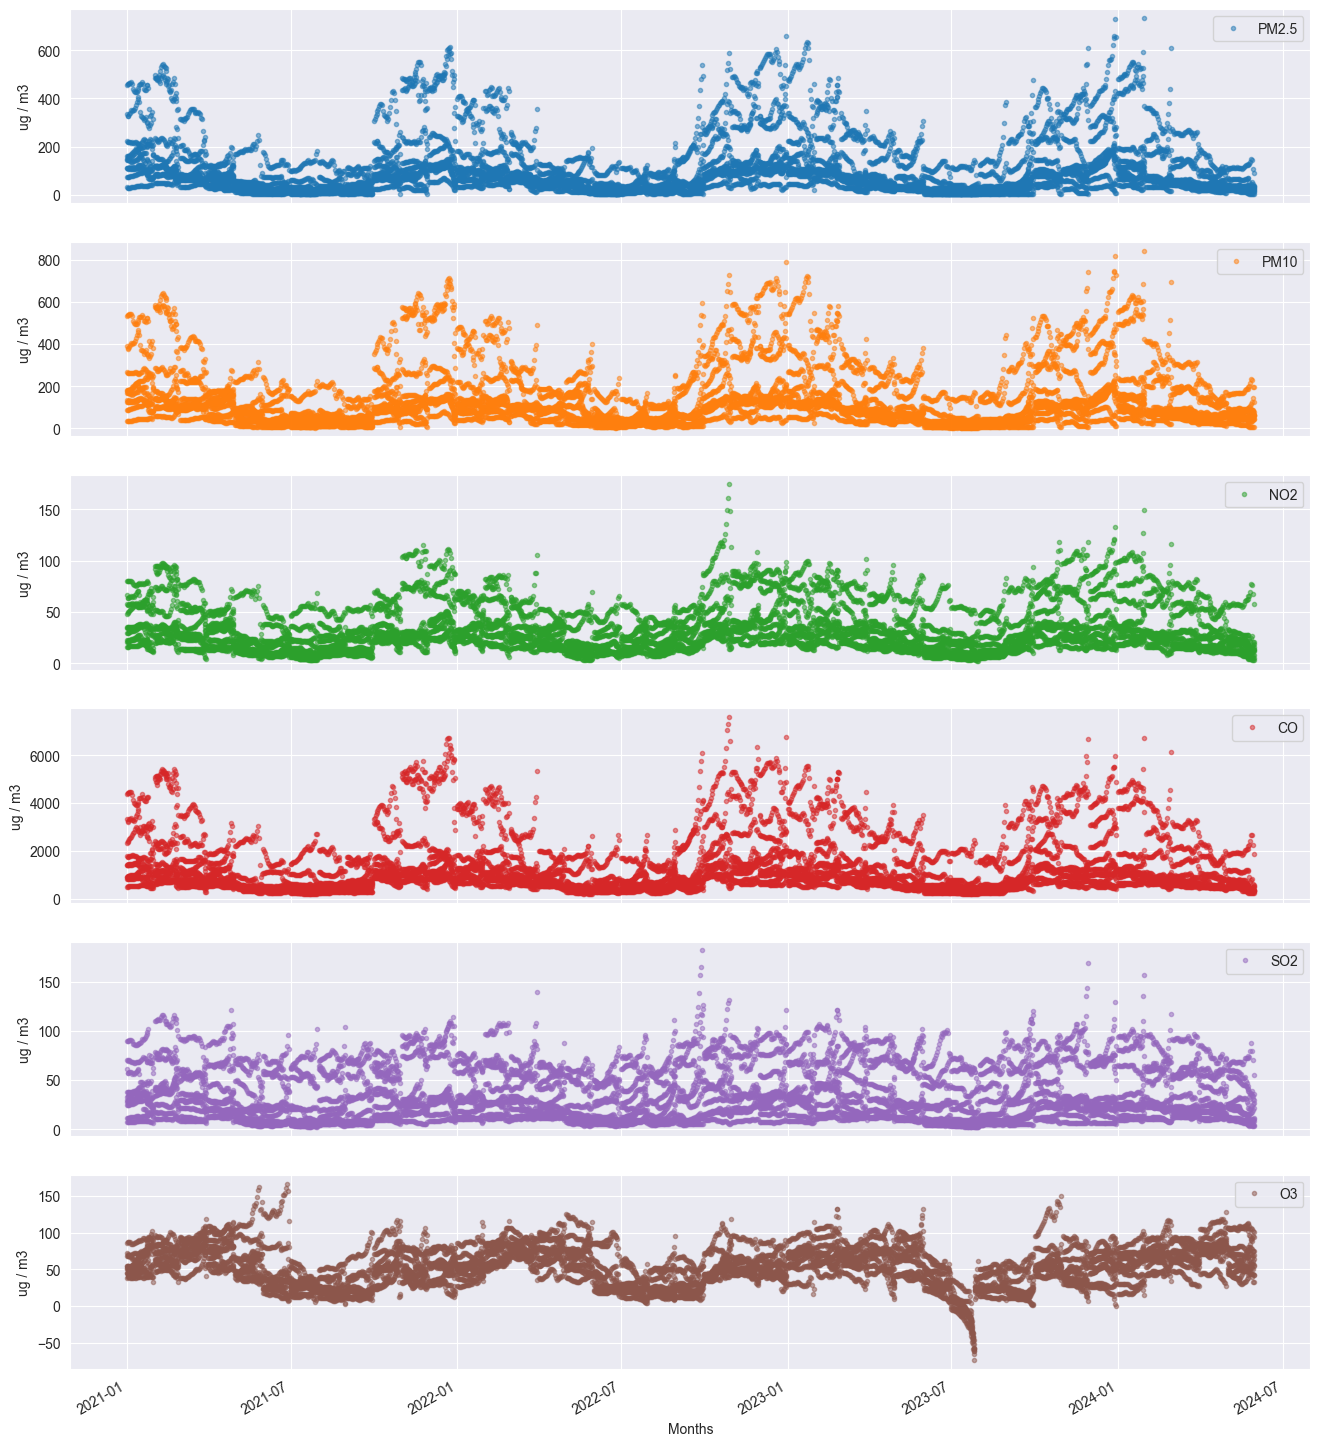

In [23]:
copy_df = new_df.copy()
copy_df.set_index('date',inplace=True)
axes = copy_df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Months')
    ax.set_ylabel('ug / m3')

<div style="background-color: black; padding:20px; font-size:20px; color: white">
PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.

## 5.3 Visulaizing the trends in air pollutants 

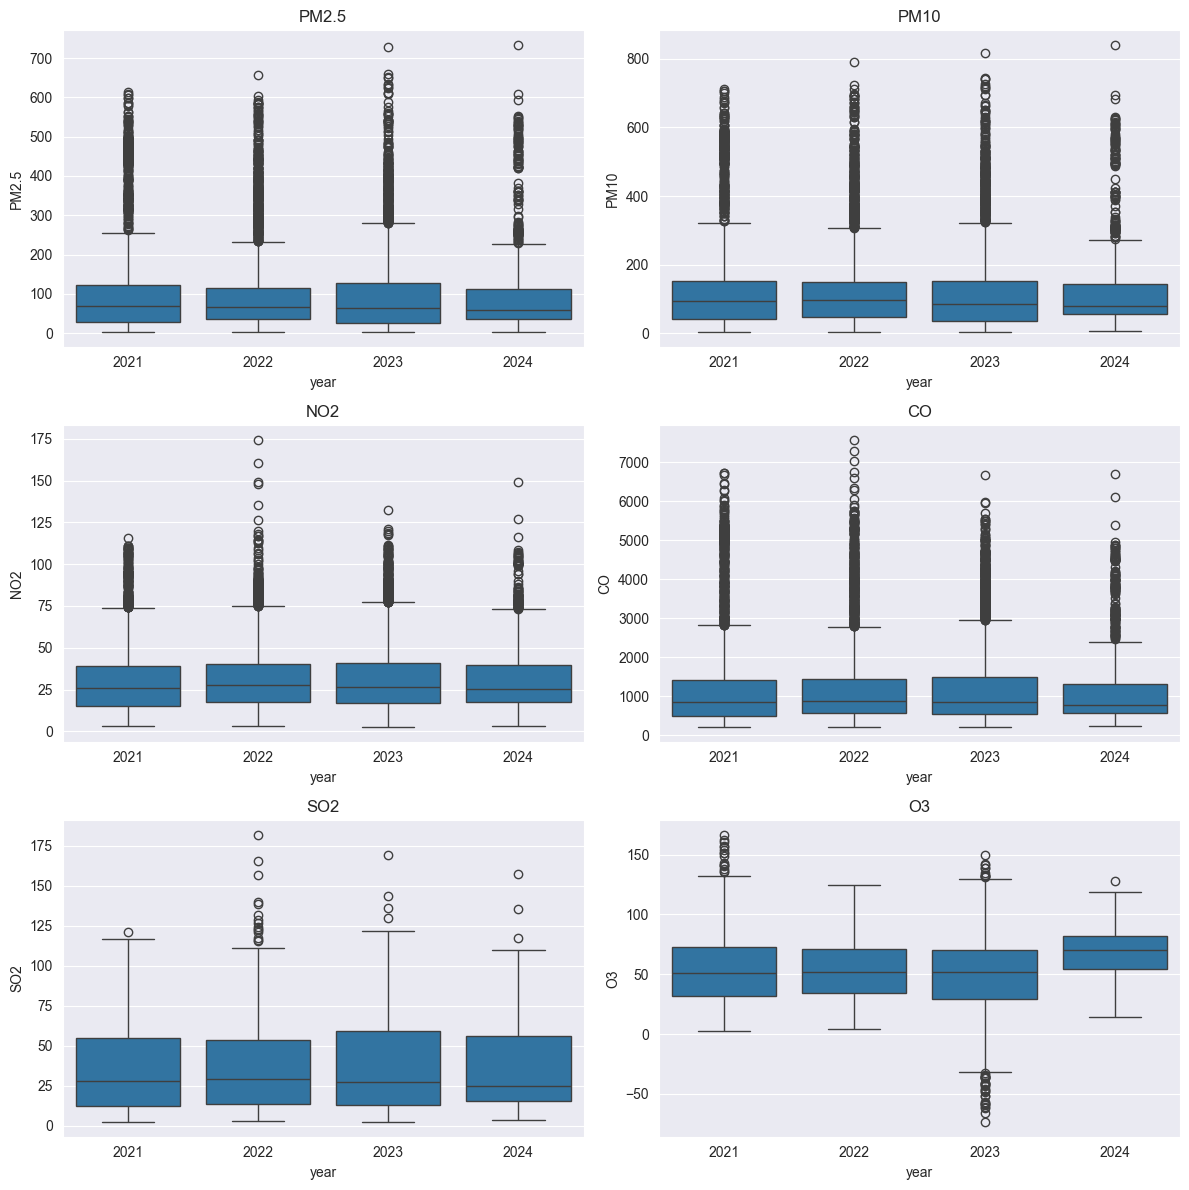

In [24]:
copy_df = new_df.copy()
values=['PM2.5','PM10','NO2', 'CO', 'SO2','O3']

copy_df['year'] = copy_df['date'].dt.year
copy_df['month'] = copy_df['date'].dt.strftime('%b')
years = copy_df['year'].unique()

plt.figure(figsize=(12, 12))
for i, col in enumerate(values, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=copy_df, x='year', y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

## 5.4 Distribuiton of various gases and particulate in air

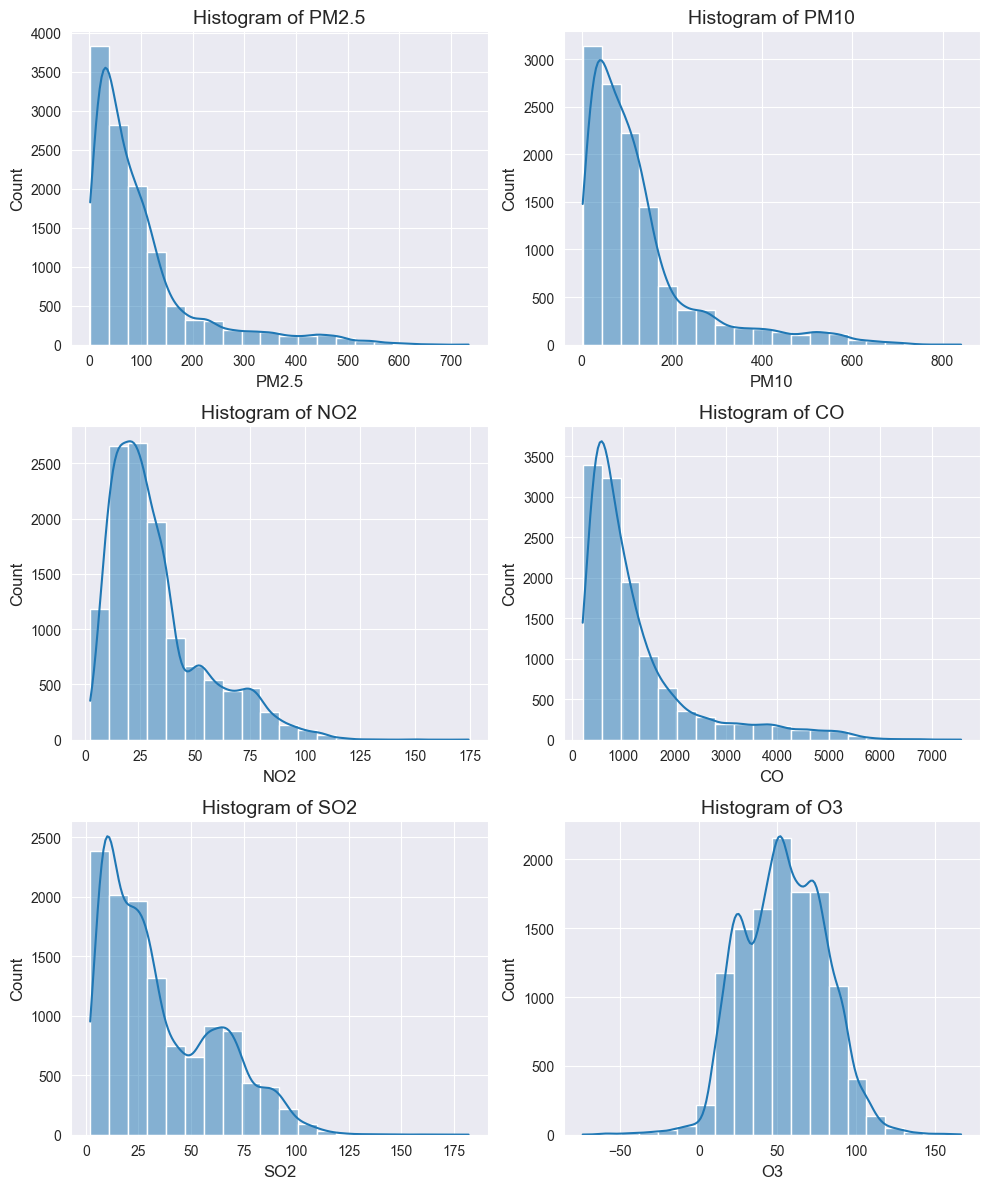

In [25]:
plt.figure(figsize=(10, 12))

for i, col in enumerate(pollutants, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(copy_df[col].dropna(), bins=20, kde=True, edgecolor='white')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Histogram of {col}', fontsize=14)

plt.tight_layout()
plt.show()

## 5.4 Visulaizing the most polluted city within India in terms of air pollution

In [36]:

def max_polluted_city(pollutant):
    x1 = copy_df[[pollutant,'city']].groupby(["city"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''.join([copy_df.to_html() + '&nbsp;&nbsp;&nbsp;' for copy_df in args])
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
o3 = max_polluted_city('O3')

display_side_by_side(pm2_5,pm10,no2,so2,co,o3)

,city,PM2.5
0,New Delhi,158.800000
1,Delhi,153.310000
2,Ghaziabad,150.990000
3,Muzaffarnagar,146.090000
4,Lucknow,142.050000
5,Patna,135.920000
6,Hapur,133.090000
7,Gandhinagar,120.290000
8,Chandigarh,117.020000
9,Kolkata,116.470000


## 5.5 Plotting the average AQI over the years for major cities which have AQI greater than 500

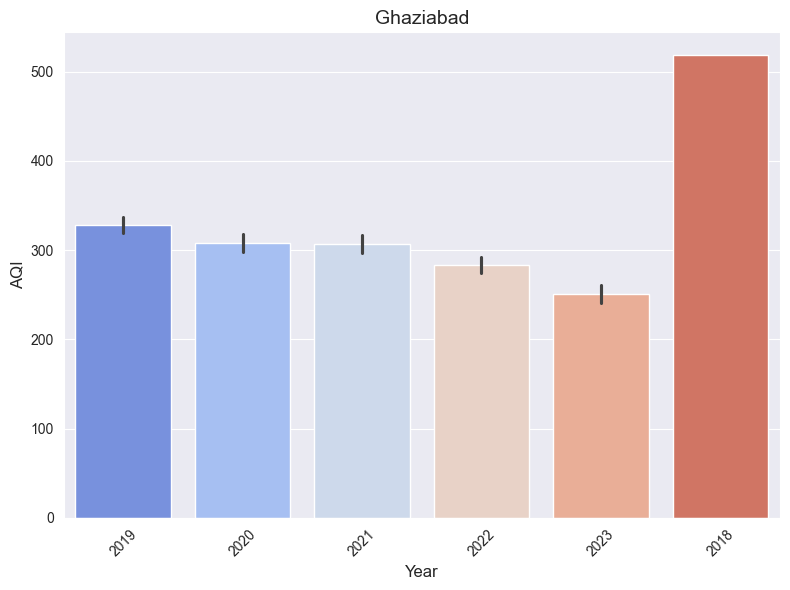

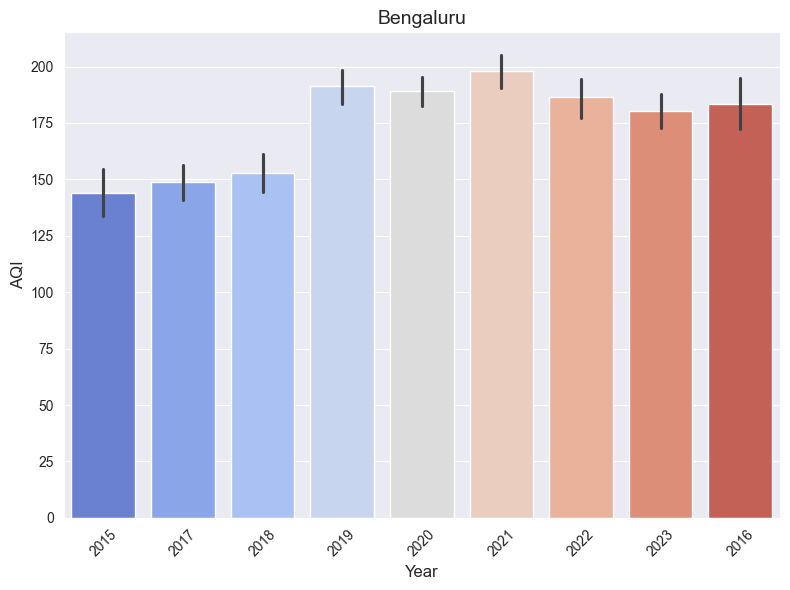

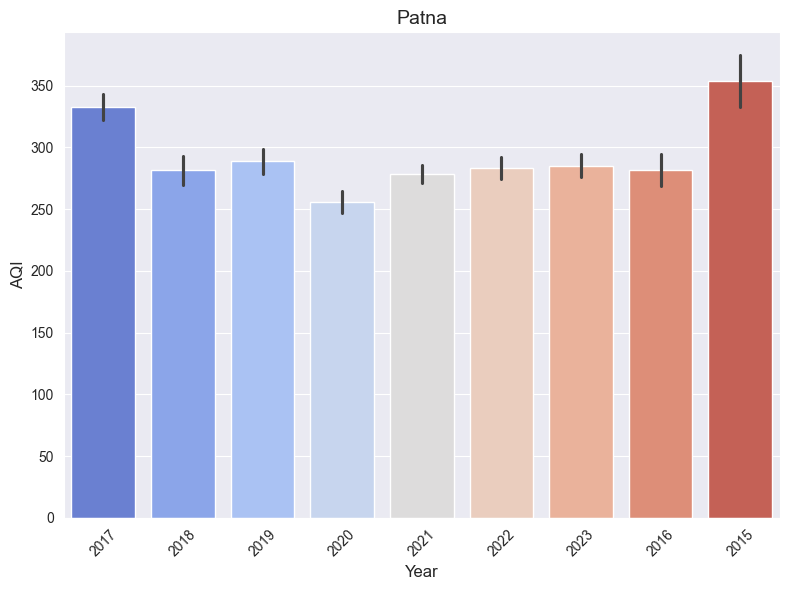

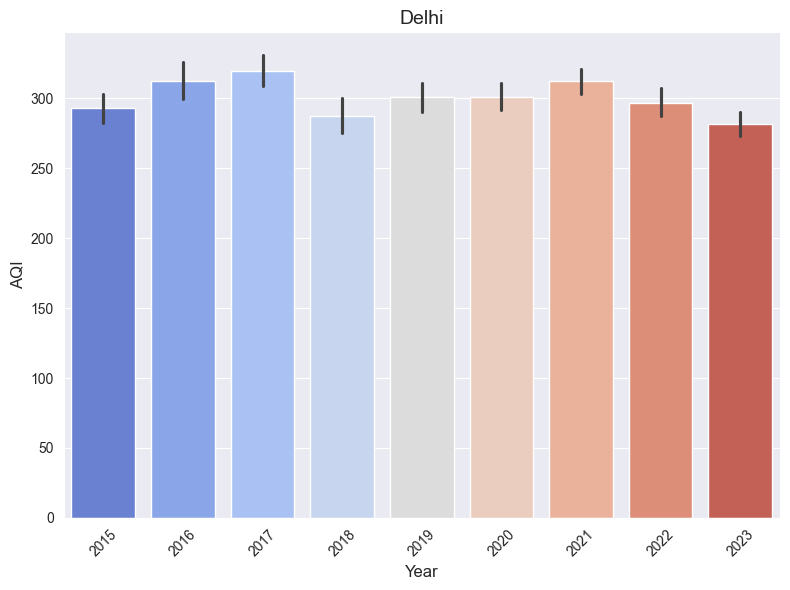

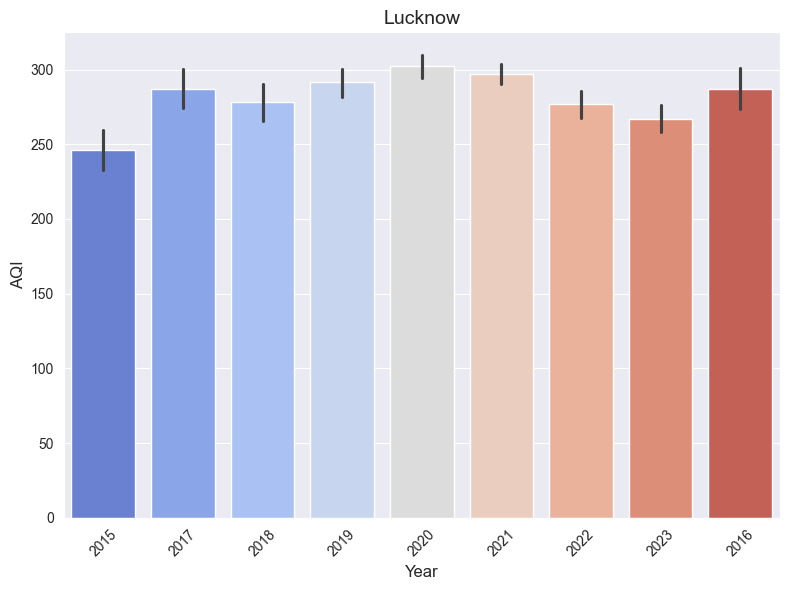

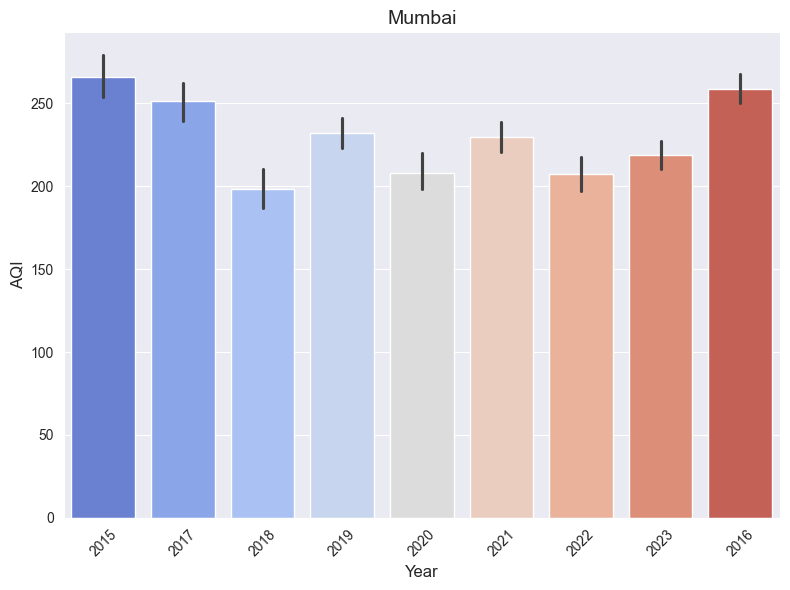

In [38]:
copy_df['city'][copy_df['AQI_calculated'] >= 500].value_counts()
copy_df['Year'] = copy_df['date'].dt.year.astype(str)
cols = ["Ghaziabad", "Bengaluru", "Patna", "Delhi", "Lucknow", "Mumbai"]
for col in cols:
    plt.figure(figsize=(8, 6))  
    plt.title(col, fontsize=14)  
    x = copy_df[copy_df['city'] == col]
    sns.barplot(x='Year', y='AQI_calculated', data=x, palette='coolwarm')  
    plt.xlabel('Year', fontsize=12)  
    plt.ylabel('AQI', fontsize=12)  
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    plt.show()

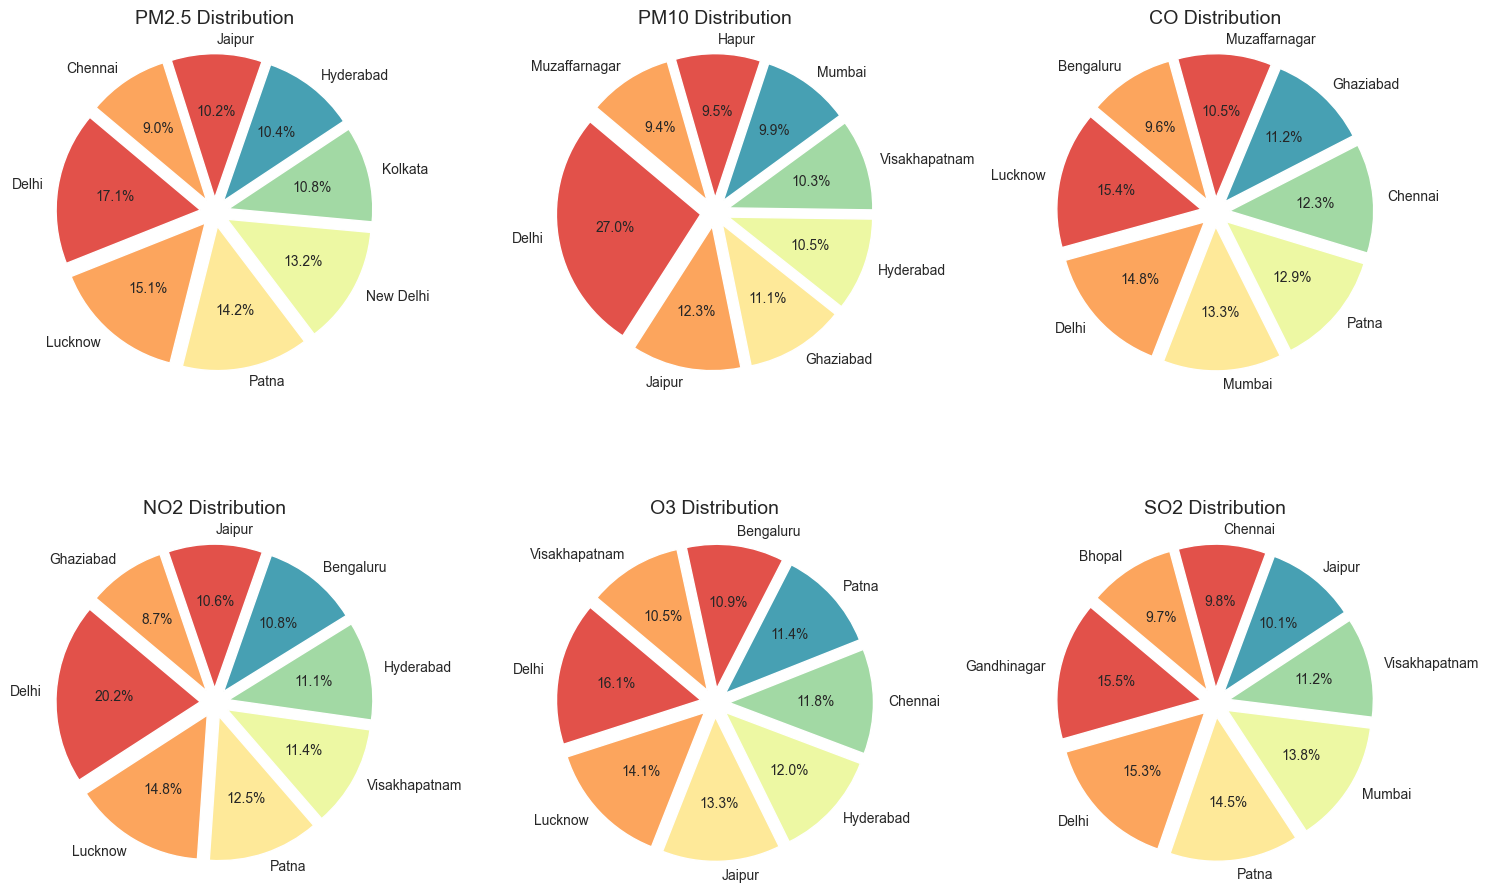

In [39]:
cols = ['PM2.5', 'PM10', 'CO', 'NO2', 'O3', 'SO2']

# Generate colors using Seaborn's color_palette
colors = sns.color_palette('Spectral', len(cols))

# Define explode values for each slice
explode = [0.1] * len(cols)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each pollutant
for i, col in enumerate(cols):
    # Group data by city and sum up the pollutant values, then sort in descending order
    x = copy_df.groupby('city')[col].sum().sort_values(ascending=False)[:8]
    
    # Adjust explode list to match the length of x
    explode = [0.1] * len(x)
    
    # Plot pie chart using Seaborn's countplot function
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%', startangle=140, colors=colors[:len(x)], explode=explode)
    
    # Set plot title
    axes[i].set_title(f'{col} Distribution', fontsize=14)
    
# Adjust layout
plt.tight_layout()
plt.show()

## 5.6 Effect of Lockdown on AQI

In [40]:
# AQI for some of the major cities of India
cities = ["Ghaziabad", "Bengaluru", "Patna", "Delhi", "Lucknow", "Mumbai"]

filtered_city_day = new_df[new_df['date'] >= '2018-01-01']
AQI = filtered_city_day[filtered_city_day.city.isin(cities)][['date','city','AQI_calculated','AQI_bucket_calculated']]
AQI.head()

,date,city,AQI_calculated,AQI_bucket_calculated
26,2018-01-01,Bengaluru,217.0,Poor
28,2018-01-01,Delhi,471.0,Severe
33,2018-01-01,Lucknow,368.0,Very Poor
34,2018-01-01,Mumbai,335.0,Very Poor
38,2018-01-01,Patna,339.0,Very Poor


## 5.7 correlation analysis


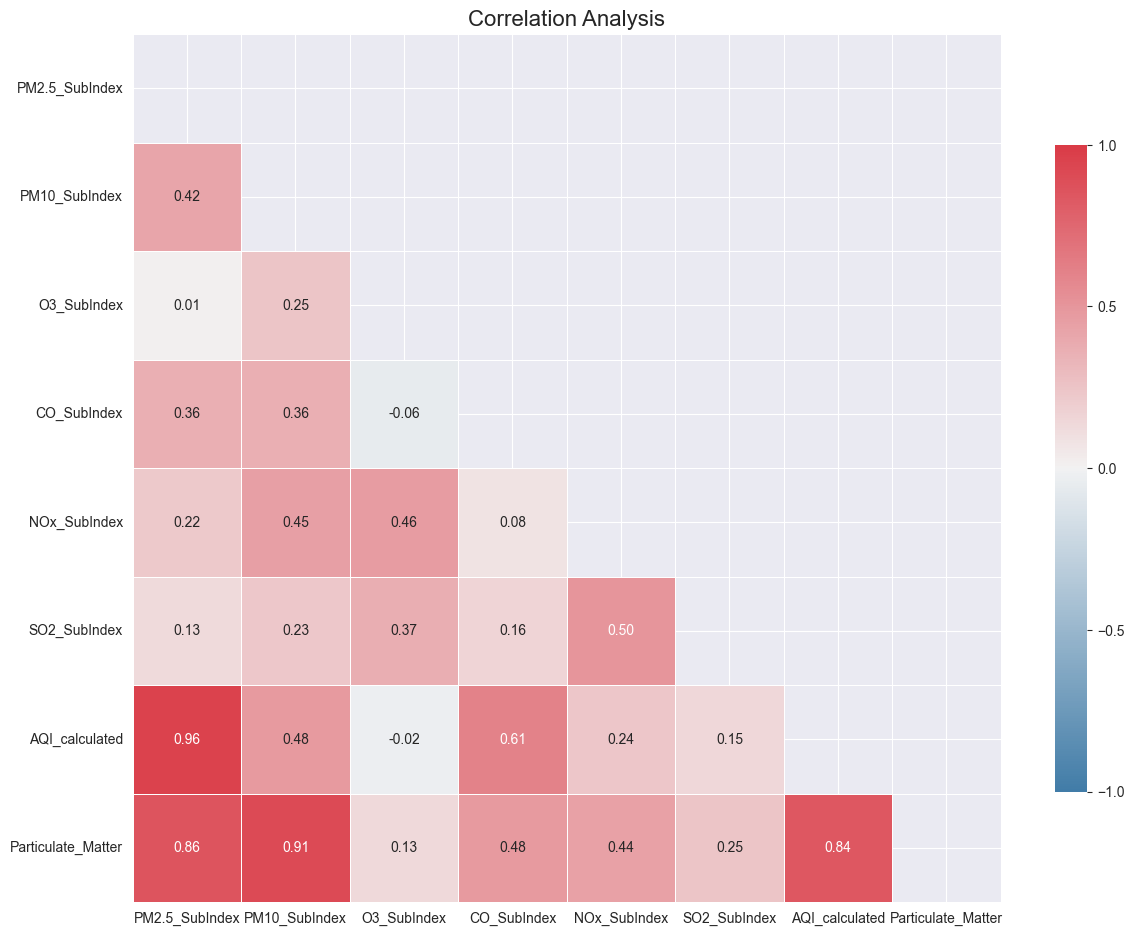

In [42]:
plt.figure(figsize=(14, 12))

# Assuming `new_df` is your DataFrame
copy_df = new_df.select_dtypes(include='float64')
copy_df = copy_df.iloc[ : , 11:]
# Calculate correlation matrix
correlation_matrix = copy_df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define custom color palette
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin=-1,
            linewidths=.5,
            cbar_kws={"shrink": 0.7, "ticks": [-1, -0.5, 0, 0.5, 1]},
            square=True)

# Add title
plt.title('Correlation Analysis', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()

## 5.8 Time Series Analysis

In [43]:
copy_df = new_df.copy()
copy_df.head()

,date,city,CO,dew,humidity,NO2,O3,PM10,PM2.5,pressure,...,PM2.5_SubIndex,PM10_SubIndex,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated,Particulate_Matter
0,2015-01-01,Bengaluru,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.0,0.000000,5.750,0.000,1,NaN,NaN,NaN
1,2015-01-01,Chennai,10.900000,NaN,NaN,5.5,1.6,29.0,153.0,NaN,...,325.384615,29.000000,1.6,212.857137,6.875,4.875,6,325.0,Very Poor,182.0
2,2015-01-01,Delhi,20.799999,NaN,NaN,66.5,5.2,230.0,382.0,NaN,...,501.538462,186.666667,5.2,322.352937,83.125,12.375,6,502.0,Severe,612.0
3,2015-01-01,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN,...,391.538462,0.000000,0.0,0.000000,0.000,0.000,1,NaN,NaN,NaN
4,2015-01-01,Lucknow,18.500000,NaN,NaN,1.0,NaN,188.0,NaN,NaN,...,0.000000,158.666667,0.0,308.823529,1.250,4.375,4,309.0,Very Poor,NaN


<Figure size 1200x1200 with 0 Axes>

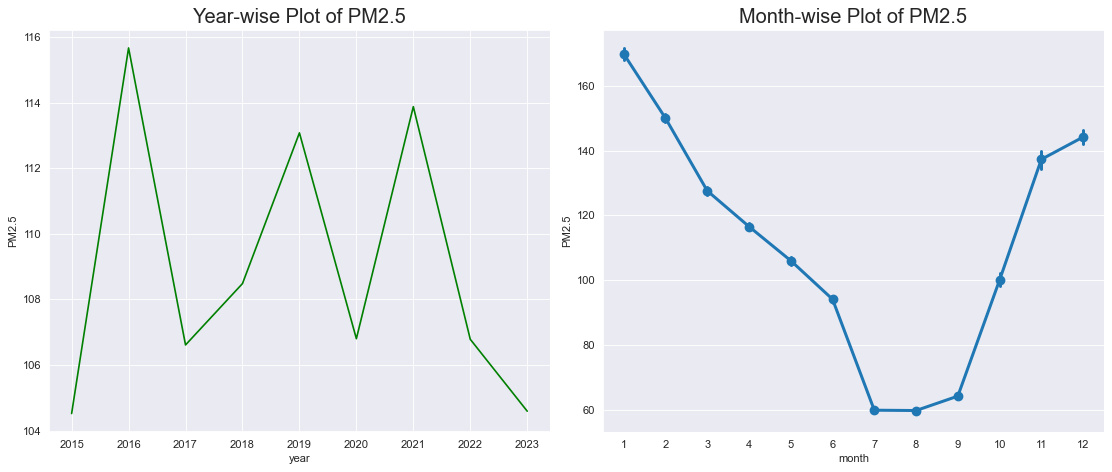

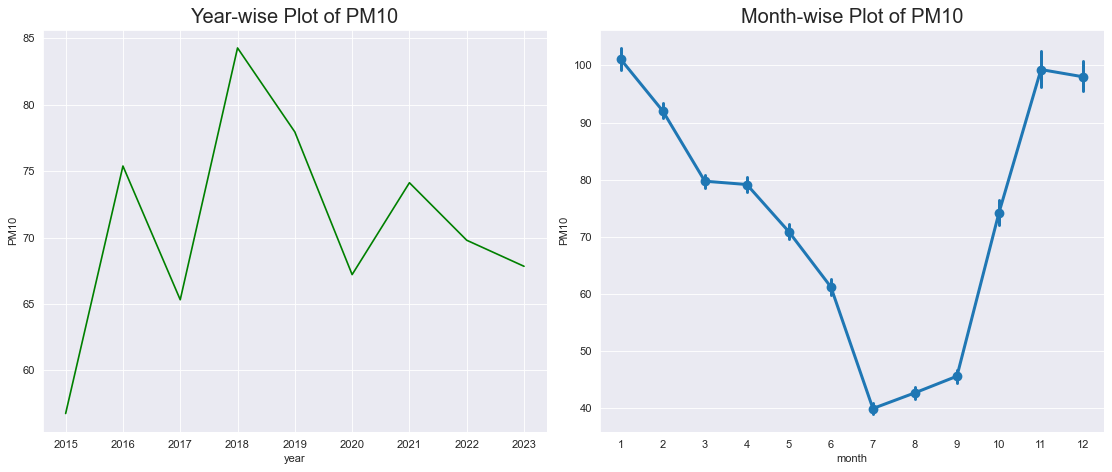

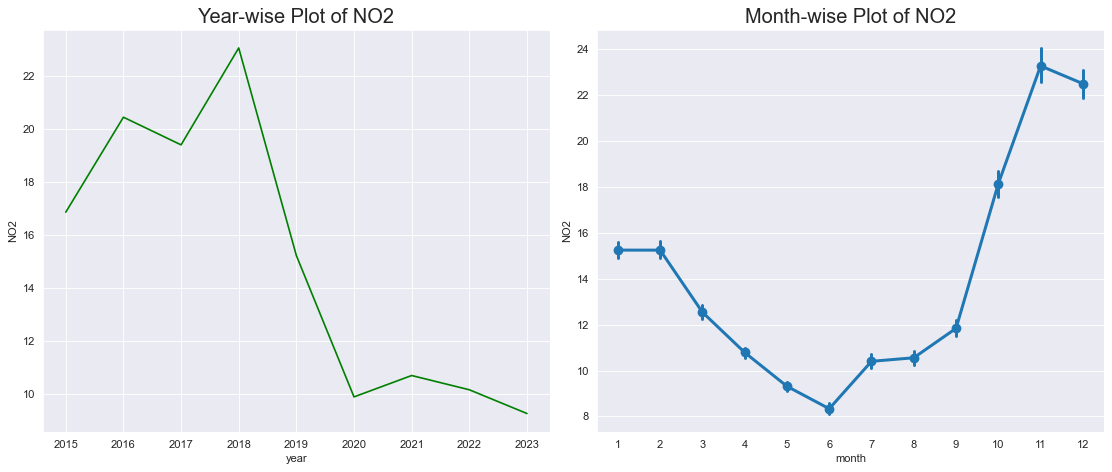

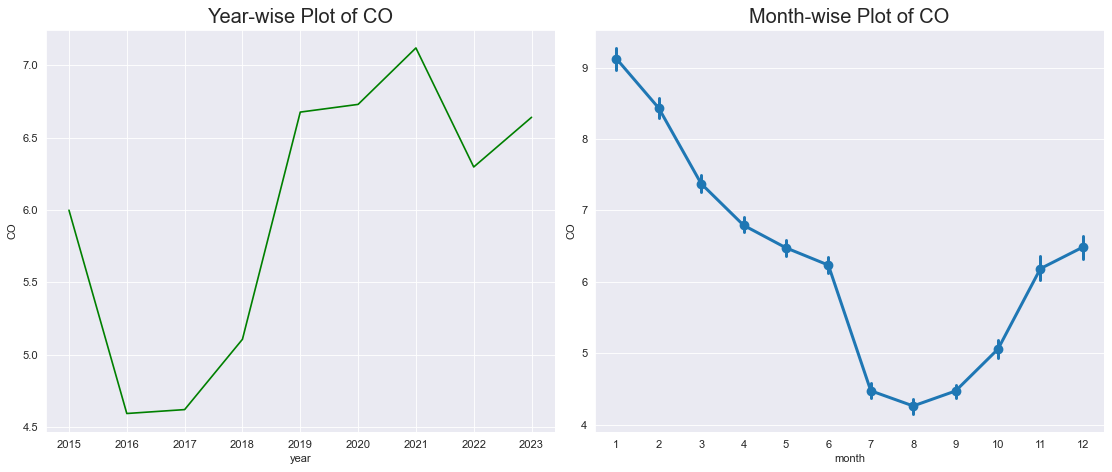

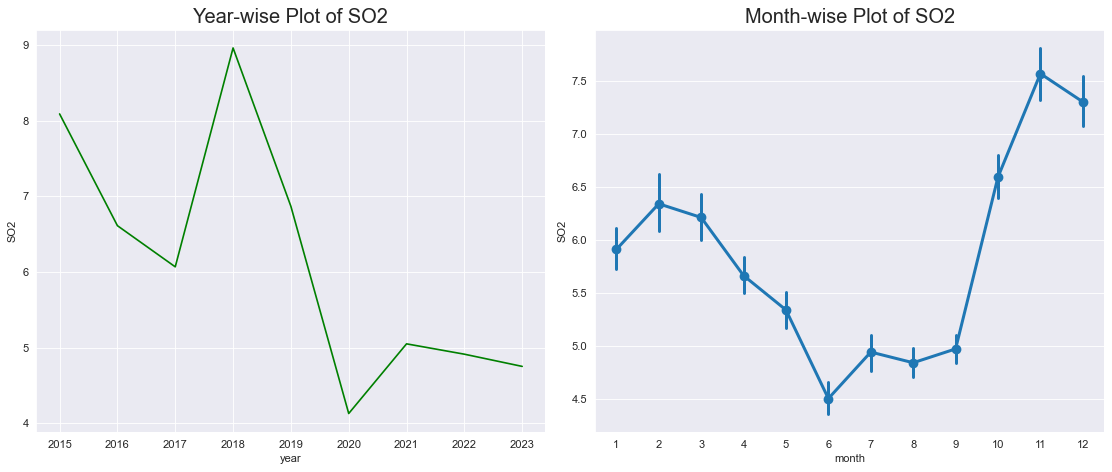

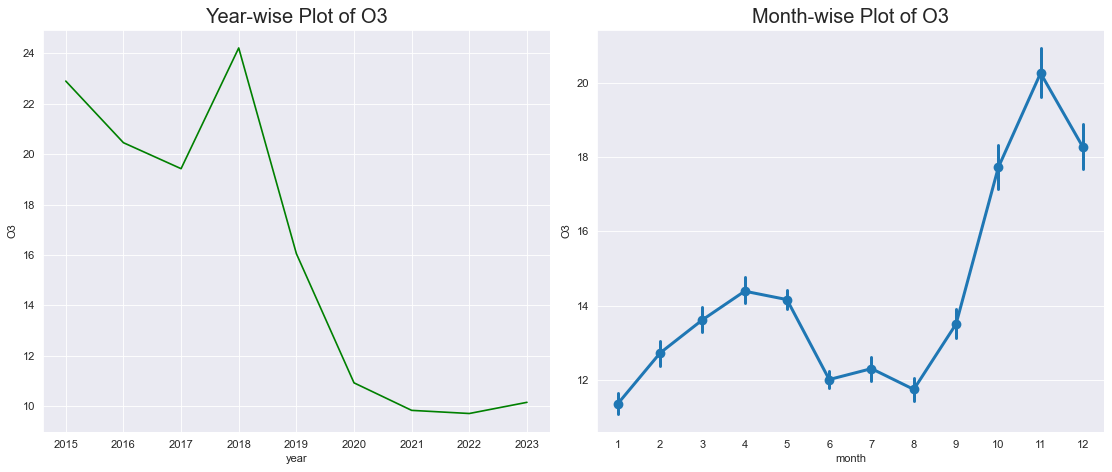

In [44]:
# Line plot analysis for amount of particulate matter and gases  over the years

copy_df['month'] = copy_df['date'].dt.month.astype(str)
copy_df['year'] = copy_df['date'].dt.year.astype(str)
values=['PM2.5','PM10','NO2', 'CO', 'SO2','O3']
plt.figure(figsize=(12, 12))

for i, value in enumerate(values, 1):
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.lineplot(x='year', y=value, data=copy_df, ax=axes[0], c='green', errorbar=None)
    sns.pointplot(x='month', y=value, data=copy_df.loc[~copy_df.year.isin([2015, 2023]), :])

    # Set Title
    axes[0].set_title(f'Year-wise Plot of {value}', fontsize=18); 
    axes[1].set_title(f'Month-wise Plot of {value}', fontsize=18)

    plt.tight_layout()
    plt.show()